In [29]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as plot

In [30]:
vacinations_df = pd.read_csv("Final_Project/country_vaccinations_raw.csv")
cases_deaths_df = pd.read_csv("Final_Project/worldometer_coronavirus_daily_data_raw.csv")

In [31]:
cleaned_vacinations_df = vacinations_df.drop(["iso_code", 'daily_vaccinations_raw', "source_name", "source_website", "daily_vaccinations_per_million", "people_fully_vaccinated_per_hundred", "people_vaccinated_per_hundred", "total_vaccinations_per_hundred"], axis=1)

In [32]:
cleaned_vacinations_df['date'] = pd.to_datetime(cleaned_vacinations_df["date"])

In [33]:
cleaned_cases_deaths_df = cases_deaths_df[cases_deaths_df["date"] > "2021-1-01"]
cleaned_cases_deaths_df['country'] = cleaned_cases_deaths_df['country'].replace("USA", "United States")
cleaned_cases_deaths_df['country'] = cleaned_cases_deaths_df['country'].replace("UK", "United Kingdom")

In [34]:
cleaned_cases_deaths_df['date'] = pd.to_datetime(cleaned_cases_deaths_df["date"])

In [35]:
combined_df = pd.merge(cleaned_vacinations_df, cleaned_cases_deaths_df, how='inner', on=("country", 'date'))

In [36]:
 # Drop the null columns where all values are null
clean_data = combined_df.dropna(axis='columns', how='all')
# Drop the null rows
clean_data = clean_data.dropna()

In [37]:
total_by_country=clean_data.groupby(["country"])["people_fully_vaccinated"].max().sort_values(ascending=False)

In [38]:
countries = ["United States", "Israel", "Germany","Italy","United Kingdom","Romania","Mexico", "Chile", "Denmark", "Belgium"]

In [39]:
final_df = clean_data[clean_data['country'].isin(countries)]

In [40]:
final_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
412,Belgium,2021-01-18,134407.0,134298.0,109.0,14538.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",678839.0,1630.0,611445.0,20435.0,39.0
413,Belgium,2021-01-19,153631.0,153341.0,290.0,15067.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",679771.0,932.0,611973.0,20472.0,37.0
414,Belgium,2021-01-20,174654.0,173942.0,712.0,15073.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",681250.0,1479.0,613181.0,20554.0,82.0
415,Belgium,2021-01-21,204483.0,203771.0,712.0,16080.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",684256.0,3006.0,616169.0,20572.0,18.0
416,Belgium,2021-01-22,233671.0,232928.0,743.0,16951.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",686827.0,2571.0,618532.0,20620.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,United States,2021-02-22,64177474.0,44138118.0,19438495.0,1446445.0,"Moderna, Pfizer/BioNTech",28829332.0,59624.0,9201798.0,513394.0,1378.0
3652,United States,2021-02-23,65032083.0,44544969.0,19882544.0,1401674.0,"Moderna, Pfizer/BioNTech",28902002.0,72670.0,9160072.0,515838.0,2444.0
3653,United States,2021-02-24,66464947.0,45237143.0,20607261.0,1454731.0,"Moderna, Pfizer/BioNTech",28977573.0,75571.0,9118705.0,518371.0,2533.0
3654,United States,2021-02-25,68274117.0,46074392.0,21555117.0,1505193.0,"Moderna, Pfizer/BioNTech",29056287.0,78714.0,9094502.0,520836.0,2465.0


In [41]:
days_country={}
filter_vac=2
for country in final_df['country'].unique():
    print(country)
    days_country[country]=list(final_df['daily_vaccinations'][(final_df['country']==country) & (final_df['people_fully_vaccinated']>filter_vac)].values)

Belgium
Chile
Denmark
Germany
Israel
Italy
Mexico
Romania
United Kingdom
United States


In [42]:
n_max=0
for k,v in days_country.items():
    print(f"{k} has {len(v)}")
    if len(v) > n_max:
        n_max=len(v)
print(n_max)

Belgium has 40
Chile has 45
Denmark has 43
Germany has 44
Israel has 51
Italy has 41
Mexico has 41
Romania has 41
United Kingdom has 49
United States has 40
51


In [43]:
for k,v in days_country.items():
    print(f"{k} has {len(v)}")
    if len(v) < n_max:
        for i in range(0,n_max-len(v)):
            days_country[k].insert(0,0)
days_country

Belgium has 40
Chile has 45
Denmark has 43
Germany has 44
Israel has 51
Italy has 41
Mexico has 41
Romania has 41
United Kingdom has 49
United States has 40


{'Belgium': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  14538.0,
  15067.0,
  15073.0,
  16080.0,
  16951.0,
  17389.0,
  17187.0,
  17224.0,
  16248.0,
  15546.0,
  14467.0,
  13136.0,
  12602.0,
  12462.0,
  11948.0,
  13457.0,
  15248.0,
  16597.0,
  17948.0,
  18218.0,
  18535.0,
  18843.0,
  19348.0,
  18755.0,
  19160.0,
  19699.0,
  19984.0,
  19813.0,
  20296.0,
  18567.0,
  17742.0,
  16456.0,
  15797.0,
  15335.0,
  15353.0,
  15052.0,
  15437.0,
  15526.0,
  15388.0,
  14286.0],
 'Chile': [0,
  0,
  0,
  0,
  0,
  0,
  147.0,
  1135.0,
  1625.0,
  1638.0,
  1638.0,
  3215.0,
  5975.0,
  7158.0,
  6607.0,
  6176.0,
  6163.0,
  6163.0,
  4788.0,
  2116.0,
  791.0,
  354.0,
  296.0,
  296.0,
  296.0,
  94.0,
  1885.0,
  26185.0,
  51308.0,
  75453.0,
  79431.0,
  80657.0,
  113910.0,
  149276.0,
  164949.0,
  176054.0,
  184636.0,
  184874.0,
  184286.0,
  188884.0,
  183029.0,
  169841.0,
  155721.0,
  143264.0,
  140421.0,
  139950.0,
  117530.0,
  99573.0,
  8507

In [44]:
days_dimension=pd.DataFrame(days_country)

<AxesSubplot:>

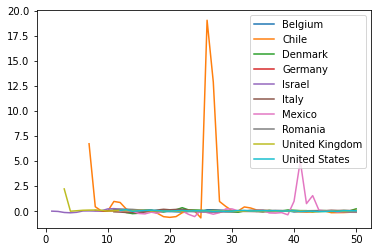

In [45]:
days_dimension.pct_change().plot()

In [46]:
days_dimension

,Belgium,Chile,Denmark,Germany,Israel,Italy,Mexico,Romania,United Kingdom,United States
0,0.0,0.0,0.0,0.0,113950.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,113238.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,109323.0,0.0,0.0,0.0,56740.0,0.0
3,0.0,0.0,0.0,0.0,94053.0,0.0,0.0,0.0,182378.0,0.0
4,0.0,0.0,0.0,0.0,77992.0,0.0,0.0,0.0,180016.0,0.0
5,0.0,0.0,0.0,0.0,68443.0,0.0,0.0,0.0,185923.0,0.0
6,0.0,147.0,0.0,0.0,69091.0,0.0,0.0,0.0,201110.0,0.0
7,0.0,1135.0,0.0,71090.0,70269.0,0.0,0.0,0.0,221049.0,0.0
8,0.0,1625.0,7099.0,75711.0,70266.0,0.0,0.0,0.0,244356.0,0.0
9,0.0,1638.0,7487.0,75700.0,71821.0,0.0,0.0,0.0,260980.0,0.0


In [47]:
import pycaret

In [53]:
from pycaret.classification import setup
from pycaret.classification import tune_model
from pycaret.classification import compare_models, create_model,plot_model, predict_model

In [89]:
final_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
412,Belgium,2021-01-18,134407.0,134298.0,109.0,14538.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",678839.0,1630.0,611445.0,20435.0,39.0
413,Belgium,2021-01-19,153631.0,153341.0,290.0,15067.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",679771.0,932.0,611973.0,20472.0,37.0
414,Belgium,2021-01-20,174654.0,173942.0,712.0,15073.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",681250.0,1479.0,613181.0,20554.0,82.0
415,Belgium,2021-01-21,204483.0,203771.0,712.0,16080.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",684256.0,3006.0,616169.0,20572.0,18.0
416,Belgium,2021-01-22,233671.0,232928.0,743.0,16951.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",686827.0,2571.0,618532.0,20620.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,United States,2021-02-22,64177474.0,44138118.0,19438495.0,1446445.0,"Moderna, Pfizer/BioNTech",28829332.0,59624.0,9201798.0,513394.0,1378.0
3652,United States,2021-02-23,65032083.0,44544969.0,19882544.0,1401674.0,"Moderna, Pfizer/BioNTech",28902002.0,72670.0,9160072.0,515838.0,2444.0
3653,United States,2021-02-24,66464947.0,45237143.0,20607261.0,1454731.0,"Moderna, Pfizer/BioNTech",28977573.0,75571.0,9118705.0,518371.0,2533.0
3654,United States,2021-02-25,68274117.0,46074392.0,21555117.0,1505193.0,"Moderna, Pfizer/BioNTech",29056287.0,78714.0,9094502.0,520836.0,2465.0


In [120]:
Israel = final_df[final_df['country'] == "Israel"]


In [90]:
grid = setup(data=Israel, target=final_df.columns[-2], html=True, silent=False, verbose=True,
            numeric_features = ['daily_vaccinations', 'daily_new_cases'])

,Description,Value
0,session_id,3448
1,Target,cumulative_total_deaths
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(54, 12)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [96]:
top3 = compare_models()

AttributeError: 'list' object has no attribute 'value_counts'

In [100]:
final_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
412,Belgium,2021-01-18,134407.0,134298.0,109.0,14538.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",678839.0,1630.0,611445.0,20435.0,39.0
413,Belgium,2021-01-19,153631.0,153341.0,290.0,15067.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",679771.0,932.0,611973.0,20472.0,37.0
414,Belgium,2021-01-20,174654.0,173942.0,712.0,15073.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",681250.0,1479.0,613181.0,20554.0,82.0
415,Belgium,2021-01-21,204483.0,203771.0,712.0,16080.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",684256.0,3006.0,616169.0,20572.0,18.0
416,Belgium,2021-01-22,233671.0,232928.0,743.0,16951.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",686827.0,2571.0,618532.0,20620.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,United States,2021-02-22,64177474.0,44138118.0,19438495.0,1446445.0,"Moderna, Pfizer/BioNTech",28829332.0,59624.0,9201798.0,513394.0,1378.0
3652,United States,2021-02-23,65032083.0,44544969.0,19882544.0,1401674.0,"Moderna, Pfizer/BioNTech",28902002.0,72670.0,9160072.0,515838.0,2444.0
3653,United States,2021-02-24,66464947.0,45237143.0,20607261.0,1454731.0,"Moderna, Pfizer/BioNTech",28977573.0,75571.0,9118705.0,518371.0,2533.0
3654,United States,2021-02-25,68274117.0,46074392.0,21555117.0,1505193.0,"Moderna, Pfizer/BioNTech",29056287.0,78714.0,9094502.0,520836.0,2465.0


In [99]:
from fbprophet import Prophet

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
1754,Israel,2021-01-04,1446128.0,1446126.0,2.0,131418.0,"Moderna, Pfizer/BioNTech",448173.0,9304.0,53912.0,3445.0,29.0
1755,Israel,2021-01-05,1572867.0,1572865.0,2.0,127043.0,"Moderna, Pfizer/BioNTech",456139.0,7966.0,58933.0,3495.0,50.0
1756,Israel,2021-01-06,1677687.0,1677685.0,2.0,119976.0,"Moderna, Pfizer/BioNTech",463448.0,7309.0,61553.0,3527.0,32.0
1757,Israel,2021-01-07,1795137.0,1795132.0,5.0,113950.0,"Moderna, Pfizer/BioNTech",471048.0,7600.0,64583.0,3552.0,25.0
1758,Israel,2021-01-08,1862283.0,1862275.0,8.0,113238.0,"Moderna, Pfizer/BioNTech",477357.0,6309.0,65008.0,3596.0,44.0
1759,Israel,2021-01-09,1907291.0,1907261.0,30.0,109323.0,"Moderna, Pfizer/BioNTech",485434.0,8077.0,69493.0,3645.0,49.0
1760,Israel,2021-01-10,1951400.0,1945390.0,6010.0,94053.0,"Moderna, Pfizer/BioNTech",491319.0,5885.0,67741.0,3671.0,26.0
1761,Israel,2021-01-11,1992070.0,1966824.0,25246.0,77992.0,"Moderna, Pfizer/BioNTech",501073.0,9754.0,72363.0,3704.0,33.0
1762,Israel,2021-01-12,2051971.0,1991085.0,60886.0,68443.0,"Moderna, Pfizer/BioNTech",510063.0,8990.0,76132.0,3770.0,66.0
1763,Israel,2021-01-13,2161321.0,2043525.0,117796.0,69091.0,"Moderna, Pfizer/BioNTech",520060.0,9997.0,78221.0,3817.0,47.0


In [ ]:
for country in countries:
    fb_model=Prophet()
    fb_model.fit(country)
    fb_data_future=fb_model.make_future_dataframe(periods=30)
    fb_forecast=fb_model.predict(fb_data_future)
    fb_forecast[['trend','yhat']].plot()
    fig,ax=plt.subplots(figsize=(10,10))
    fig_fb=fb_model.plot(fb_forecast,ax=ax)
    ax.set_title(f"Prediction \nusing Prophet");
    

In [121]:
#Israel_total=Israel.rename(columns={'date':'ds','total_vaccinations':'y'})
Israel_fully=Israel.rename(columns={'date':'ds','people_fully_vaccinated':'y'})

In [122]:
 fb_model=Prophet()

In [123]:
 fb_model.fit(Israel_fully)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [136]:
fb_data_future=fb_model.make_future_dataframe(periods=30)
fb_data_future

,ds
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08
...,...
79,2021-03-24
80,2021-03-25
81,2021-03-26
82,2021-03-27


In [137]:
fb_forecast=fb_model.predict(fb_data_future)

In [138]:
 fb_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-04,-1.999996e+03,-1.818072e+04,3.695794e+03,-1.999996e+03,-1.999996e+03,-5175.882498,-5175.882498,-5175.882498,-5175.882498,-5175.882498,-5175.882498,0.0,0.0,0.0,-7.175879e+03
1,2021-01-05,-6.190586e+03,-1.437111e+04,8.675204e+03,-6.190586e+03,-6.190586e+03,3600.680504,3600.680504,3600.680504,3600.680504,3600.680504,3600.680504,0.0,0.0,0.0,-2.589905e+03
2,2021-01-06,-1.038117e+04,-7.360422e+03,1.286931e+04,-1.038117e+04,-1.038117e+04,13486.105649,13486.105649,13486.105649,13486.105649,13486.105649,13486.105649,0.0,0.0,0.0,3.104931e+03
3,2021-01-07,-1.457174e+04,3.019750e+03,2.494286e+04,-1.457174e+04,-1.457174e+04,28404.997660,28404.997660,28404.997660,28404.997660,28404.997660,28404.997660,0.0,0.0,0.0,1.383326e+04
4,2021-01-08,-1.779813e+03,-1.130600e+04,1.064234e+04,-1.779813e+03,-1.779813e+03,1875.740404,1875.740404,1875.740404,1875.740404,1875.740404,1875.740404,0.0,0.0,0.0,9.592724e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-03-24,4.951463e+06,4.082453e+06,5.811146e+06,4.074801e+06,5.799755e+06,13486.105649,13486.105649,13486.105649,13486.105649,13486.105649,13486.105649,0.0,0.0,0.0,4.964949e+06
80,2021-03-25,5.013951e+06,4.121353e+06,5.929301e+06,4.094490e+06,5.897646e+06,28404.997660,28404.997660,28404.997660,28404.997660,28404.997660,28404.997660,0.0,0.0,0.0,5.042356e+06
81,2021-03-26,5.076438e+06,4.108477e+06,6.026547e+06,4.102683e+06,6.030308e+06,1875.740404,1875.740404,1875.740404,1875.740404,1875.740404,1875.740404,0.0,0.0,0.0,5.078314e+06
82,2021-03-27,5.138926e+06,4.086011e+06,6.110613e+06,4.115415e+06,6.139666e+06,-26433.271341,-26433.271341,-26433.271341,-26433.271341,-26433.271341,-26433.271341,0.0,0.0,0.0,5.112493e+06


<AxesSubplot:>

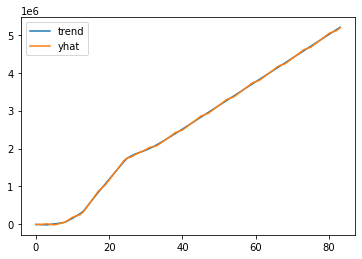

In [139]:
 fb_forecast[['trend','yhat']].plot()

In [140]:
import pandas as pd
# import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

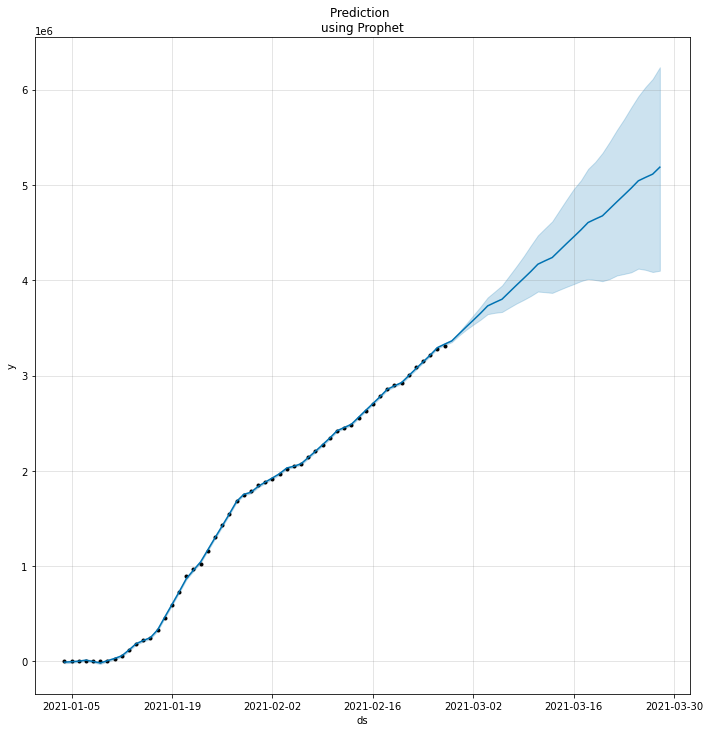

In [141]:
fig,ax=plt.subplots(figsize=(10,10))
fig_fb=fb_model.plot(fb_forecast,ax=ax)
ax.set_title(f"Prediction \nusing Prophet");
# fig_fb.title='TWTR Prediction \n using Prophet'